In [1]:
%ls
%pwd

'Practice segyio-Copy1.ipynb'*  'Weakly-labelled code.txt'*
 Pre-processing_1.ipynb*         edgedetection.ipynb*
'ReadSegyio links.txt'*


'/mnt/c/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/code'

In [2]:
import segyio
import pprint
import matplotlib.pyplot as plt
import numpy as np

In [3]:
f1 = '/mnt/c/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/Dutch Government_F3_entire_8bit seismic.segy'
f2 = '/mnt/c/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/penobscot.sgy'
# f1 = segyio.open(f1, ignore_geometry=True)
# Read full data cube
data1 = segyio.tools.cube(f1)

def readSEGY(filename):
    print('Loading data cube from',filename,'with:')

    # Read full data cube
    data = segyio.tools.cube(filename)

    # Put temporal axis first
    data = np.moveaxis(data, -1, 0)

    #Make data cube fast to acess
    data = np.ascontiguousarray(data,'float32')

    #Read meta data
    segyfile = segyio.open(filename, "r")
    print('  Crosslines: ', segyfile.xlines[0], ':', segyfile.xlines[-1])
    print('  Inlines:    ', segyfile.ilines[0], ':', segyfile.ilines[-1])
    print('  Timeslices: ', '1', ':', data.shape[0])

    #Make dict with cube-info
    data_info = {}
    data_info['crossline_start'] = segyfile.xlines[0]
    data_info['inline_start'] = segyfile.ilines[0]
    data_info['timeslice_start'] = 1 #Todo: read this from segy
    data_info['shape'] = data.shape
    #Read dt and other params needed to do create a new


    return data, data_info



(651, 951, 462)

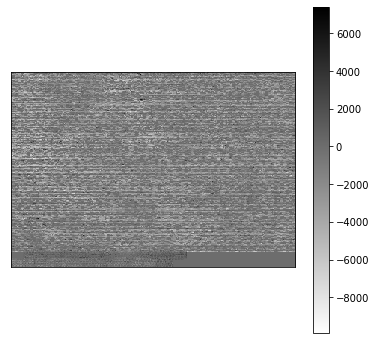

In [4]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(122)
amp = ax1.imshow(data1[:,:,15], cmap='gray_r');
fig.colorbar(amp, ax=ax1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.invert_xaxis()
data1.shape

In [5]:
data, dataInfo = readSEGY(f1)

Loading data cube from /mnt/c/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/Dutch Government_F3_entire_8bit seismic.segy with:
  Crosslines:  300 : 1250
  Inlines:     100 : 750
  Timeslices:  1 : 462


In [6]:
dataInfo

{'crossline_start': 300,
 'inline_start': 100,
 'timeslice_start': 1,
 'shape': (462, 651, 951)}

In [ ]:
with segyio.open(f1) as src:
    spec = segyio.tools.metadata(src)
    spec.samples = spec.samples[:len(spec.samples) - 50]
    with segyio.create(dstpath, spec) as dst:
        dst.text[0] = src.text[0]
        dst.bin = src.bin
        dst.header = src.header
        dst.trace = src.trace
